In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [15]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [16]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [17]:
df_South_Africa=df[df['country']=='South Africa']
df_South_Africa.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0
13,14,South Africa,Cape Town,Villa,Unfurnished,2002,360608,2004,6,7,...,12178,150994,10,15245,209614,0.14,6,9,1,0
51,52,South Africa,Johannesburg,Farmhouse,Fully-Furnished,3643,656265,2022,1,1,...,16610,547575,20,16165,108690,0.25,4,5,7,0


#### We will remove irrelevant variables and avoid model cheating.

In [18]:
df_South_Africa = df_South_Africa.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [19]:
df_South_Africa.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
1,South Africa,Apartment,Semi-Furnished,1244,224538,1990,8,8,1,1
2,South Africa,Farmhouse,Semi-Furnished,4152,745104,2019,2,1,1,1
4,South Africa,Townhouse,Fully-Furnished,531,99041,2007,3,3,1,1
13,South Africa,Villa,Unfurnished,2002,360608,2004,7,2,0,1
51,South Africa,Farmhouse,Fully-Furnished,3643,656265,2022,1,1,0,0


In [20]:
df_South_Africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15401 entries, 1 to 199998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15401 non-null  object
 1   property_type       15401 non-null  object
 2   furnishing_status   15401 non-null  object
 3   property_size_sqft  15401 non-null  int64 
 4   price               15401 non-null  int64 
 5   constructed_year    15401 non-null  int64 
 6   rooms               15401 non-null  int64 
 7   bathrooms           15401 non-null  int64 
 8   garage              15401 non-null  int64 
 9   garden              15401 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [21]:
df_South_Africa.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15401.000000,1.540100e+04,15401.00000,15401.000000,15401.000000,15401.000000,15401.000000
mean,3185.202454,5.733354e+05,1991.69502,4.508798,2.779170,0.500162,0.502630
std,1621.795527,2.919430e+05,18.63528,2.302695,1.858745,0.500016,0.500009
min,401.000000,6.809600e+04,1960.00000,1.000000,1.000000,0.000000,0.000000
25%,1783.000000,3.206990e+05,1975.00000,3.000000,1.000000,0.000000,0.000000
50%,3167.000000,5.708780e+05,1992.00000,5.000000,2.000000,1.000000,1.000000
75%,4599.000000,8.276230e+05,2008.00000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,1.083082e+06,2023.00000,8.000000,8.000000,1.000000,1.000000


In [22]:
df_South_Africa.shape

(15401, 10)

In [23]:
df_South_Africa.value_counts()

country       property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
South Africa  Apartment      Fully-Furnished    402                 70494    2009              8      3          1       0         1
              Studio         Unfurnished        5974                1072514  2004              3      1          1       0         1
                                                5423                975196   1968              1      1          0       1         1
                                                5425                980311   1962              2      1          1       0         1
                                                5432                978199   1979              5      3          0       0         1
                                                                                                                                  ..
              Farmhouse      Unfurnished        5586                100317

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999951          0.000095  0.008569   
price                         0.999951  1.000000          0.000059  0.008528   
constructed_year              0.000095  0.000059          1.000000 -0.006421   
rooms                         0.008569  0.008528         -0.006421  1.000000   
bathrooms                     0.003647  0.003679         -0.007111  0.635032   
garage                       -0.002328 -0.002357          0.000315  0.005060   
garden                       -0.001236 -0.001242         -0.010580 -0.015431   

                    bathrooms    garage    garden  
property_size_sqft   0.003647 -0.002328 -0.001236  
price                0.003679 -0.002357 -0.001242  
constructed_year    -0.007111  0.000315 -0.010580  
rooms                0.635032  0.005060 -0.015431  
bathrooms            1.000000  0.006990 -0.011637  
garage               0.006990  1.000000  0.0068

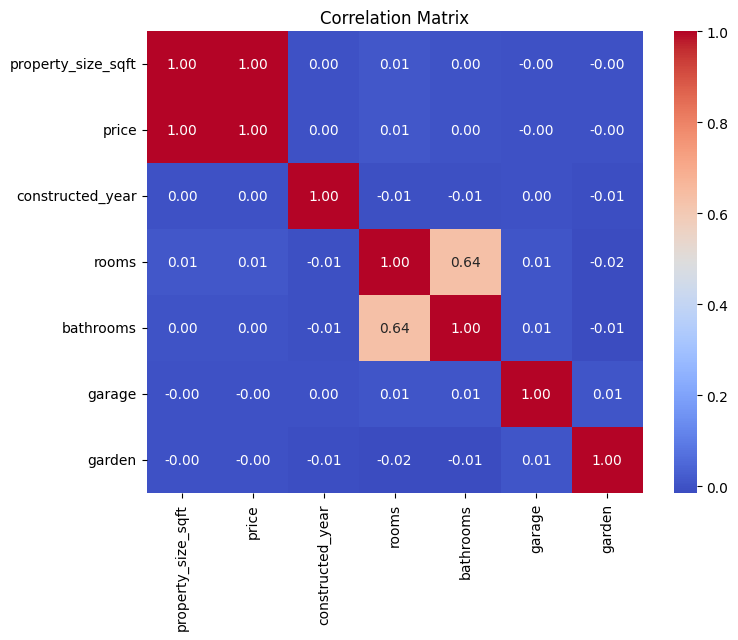

In [24]:
correlation_matrix = df_South_Africa.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [25]:
df_South_Africa = pd.get_dummies(df_South_Africa, columns=['property_type', 'furnishing_status'])
df_South_Africa.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
1,South Africa,1244,224538,1990,8,8,1,1,True,False,False,False,False,False,False,True,False
2,South Africa,4152,745104,2019,2,1,1,1,False,True,False,False,False,False,False,True,False
4,South Africa,531,99041,2007,3,3,1,1,False,False,False,False,True,False,True,False,False
13,South Africa,2002,360608,2004,7,2,0,1,False,False,False,False,False,True,False,False,True
51,South Africa,3643,656265,2022,1,1,0,0,False,True,False,False,False,False,True,False,False


In [26]:
df_South_Africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15401 entries, 1 to 199998
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15401 non-null  object
 1   property_size_sqft                 15401 non-null  int64 
 2   price                              15401 non-null  int64 
 3   constructed_year                   15401 non-null  int64 
 4   rooms                              15401 non-null  int64 
 5   bathrooms                          15401 non-null  int64 
 6   garage                             15401 non-null  int64 
 7   garden                             15401 non-null  int64 
 8   property_type_Apartment            15401 non-null  bool  
 9   property_type_Farmhouse            15401 non-null  bool  
 10  property_type_Independent House    15401 non-null  bool  
 11  property_type_Studio               15401 non-null  bool  
 12  property

In [27]:
X = df_South_Africa.drop(['price', 'country'], axis=1)
y = df_South_Africa['price']

In [28]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [29]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999070240555675
Linier Regresion RMSE :  2850.8372846995458


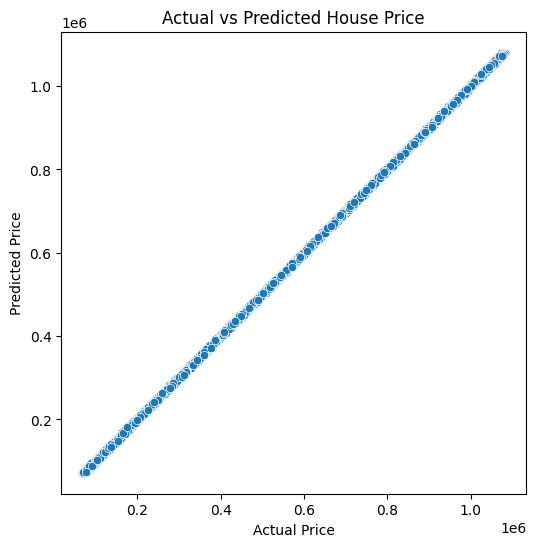

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [31]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9998017254987206
Decision Tree RMSE :  4163.135668228893


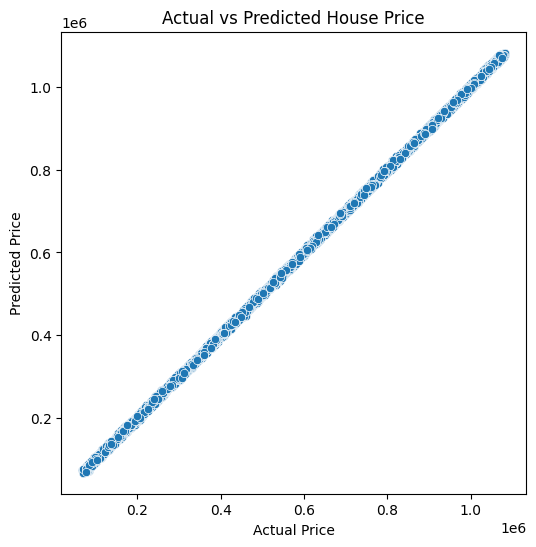

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [33]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9998898333048962
Random Forest RMSE :  4163.135668228893


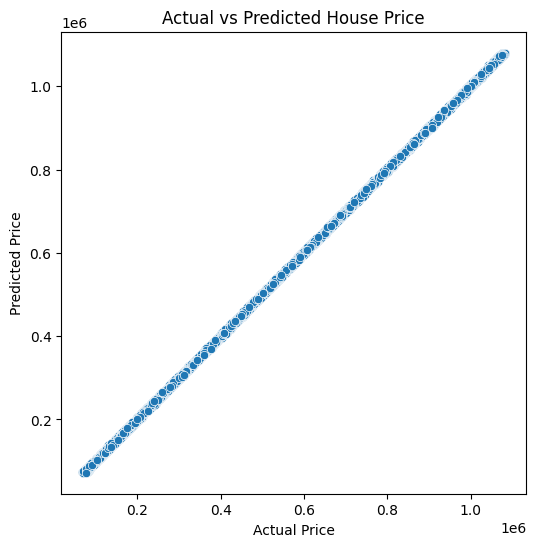

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [35]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9998570527478704
Gradient Boost RMSE :  4163.135668228893


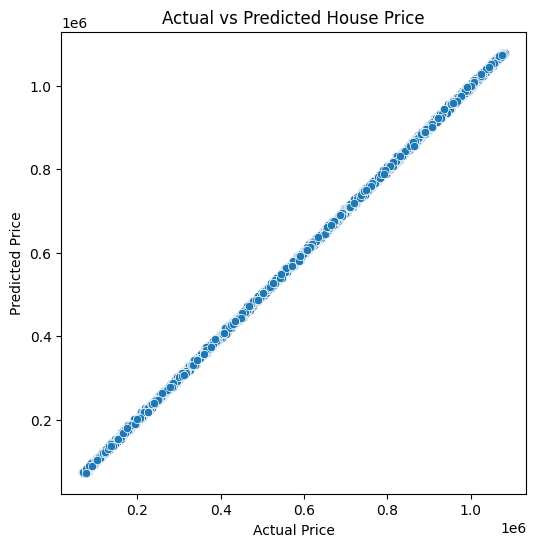

In [36]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [37]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [38]:
result

,metode,R²,RMSE
0,lr,0.999907,2850.837285
1,dt,0.999802,4163.135668
2,rf,0.999890,3103.218041
3,gb,0.999857,3534.882941
